In [1]:
%matplotlib inline

In [2]:
import h5py
from glob import glob
import numpy as np
import pandas as pd
import os

In [3]:
glob("*")

['app.py',
 'apps',
 'conf.py',
 'config.toml',
 'create_sample_data.ipynb',
 'LICENSE',
 'multiapp.py',
 'README.md',
 'requirements.txt',
 '__pycache__']

In [4]:
norm = lambda x: np.random.normal(50,10, x)
random = lambda x: np.random.rand(x)
poisson = lambda x: np.random.poisson(lam=1.0, size=x)

In [5]:
viz = lambda x: pd.DataFrame(x).hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

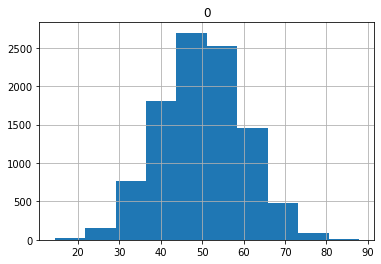

In [6]:
viz(norm(10000))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

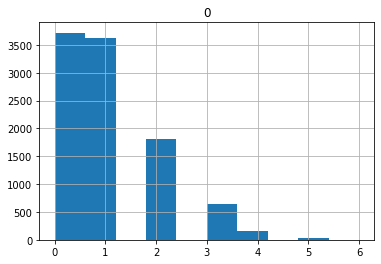

In [7]:
viz(poisson(10000))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

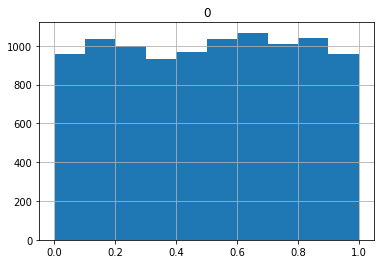

In [8]:
viz(random(10000))

In [9]:
x = 150000# 5737808

In [10]:
os.mkdir( "apps/__data/sample_data_{}".format(str(x)))

In [11]:
for i in range(4):
    with h5py.File( "apps/__data/sample_data_{}/sample_{}_{}.h5py".format(str(x),str(x),str(i)), 'w') as f:
        np.random.seed(i)
        _norm = norm(x)
        _poisson = poisson(x)
        _random = random(x)
        for name, _data in zip(["norm","poisson", "random"],[_norm,_poisson,_random]):
            dataset = f.create_dataset(name, data=_data, shape=(x, 1), compression="gzip")

In [12]:
x

150000

In [13]:
files = glob("apps/__data/sample_data_{}/*".format(str(x)))

In [14]:
files

['apps/__data/sample_data_150000\\sample_150000_0.h5py',
 'apps/__data/sample_data_150000\\sample_150000_1.h5py',
 'apps/__data/sample_data_150000\\sample_150000_2.h5py',
 'apps/__data/sample_data_150000\\sample_150000_3.h5py']

In [16]:
a = 'apps/__data/sample_data_150000\\sample_150000_0.h5py'

In [17]:
a.replace("\\","/")

'apps/__data/sample_data_150000/sample_150000_0.h5py'

In [15]:
with h5py.File('apps/__data/sample_{}_vds.h5py'.format(str(x)), mode='w') as f:
    for entry_key in ["norm","poisson", "random"]:
        M_start = 0
        layout = h5py.VirtualLayout(shape=(x*len(files), 1), dtype=np.float)
        for fname in files:
            year = fname.split("\\")[-1].split("_")[-1].split(".")[0]
            print("now {} {}".format(year, entry_key))
            with h5py.File(fname, 'r') as rf:
                rf_len = int(rf[entry_key].shape[0])
                M_end = M_start + rf_len
                vsource = h5py.VirtualSource(fname.replace("\\","/"), entry_key, shape=(rf_len,1))
                layout[M_start:M_end:1, :] = vsource
                M_start = M_end
        f.create_virtual_dataset(entry_key, layout)

now 0 norm
now 1 norm
now 2 norm
now 3 norm
now 0 poisson
now 1 poisson
now 2 poisson
now 3 poisson
now 0 random
now 1 random
now 2 random
now 3 random


C:\Users\ASANOH~1\AppData\Local\Temp/ipykernel_20488/4224139775.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  layout = h5py.VirtualLayout(shape=(x*len(files), 1), dtype=np.float)
